Name: Rethinavel Yogesh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df=pd.read_csv('upgrad_task.csv',encoding='ISO-8859-1',parse_dates=['day'])

In [3]:
# To view data
df.head()

,day,customer_id,product_type,product_title,shipping_city,shipping_region,orders,gross_sales,discounts,returns,net_sales,shipping,duties,additional_fees,taxes,total_sales,ordered_item_quantity
0,2022-01-01,5.440000e+12,Maternity and Nursing Top,Rose Melange Maternity and Feeding Sweatshirt ...,Panipat,Haryana,1,1439.83,-316.76,0.0,1123.07,0,0,0,202.15,1325.22,1
1,2022-01-01,5.730000e+12,Baby Oil,100% Natural Cold Pressed Virgin Coconut Oil f...,Gurgaon,Haryana,1,422.03,-42.20,0.0,379.83,0,0,0,68.37,448.20,1
2,2022-01-01,5.730000e+12,NaN,NaN,Gurgaon,Haryana,0,0.00,0.00,0.0,0.00,0,0,0,0.00,0.00,0
3,2022-01-01,5.730000e+12,Baby Anti-Slip Socks,Socks with a Soul Combo - Baby Polar Bear & Sw...,Gurgaon,Haryana,1,677.12,-67.71,0.0,609.41,0,0,0,109.69,719.10,1
4,2022-01-01,5.770000e+12,NaN,NaN,Ghaziabad,Uttar Pradesh,0,0.00,0.00,0.0,0.00,0,0,0,0.00,0.00,0


## Data cleaning for better analysis

In [4]:
df.isnull().sum()

day                          0
customer_id                  0
product_type             33036
product_title            30698
shipping_city              193
shipping_region            408
orders                       0
gross_sales                  0
discounts                    0
returns                      0
net_sales                    0
shipping                     0
duties                       0
additional_fees              0
taxes                        0
total_sales                  0
ordered_item_quantity        0
dtype: int64

In [5]:
# net_sales column should not be less than zero
df1=df[df['net_sales']>0]
df1=df1[df1['gross_sales']>0]

In [6]:
df1['orders'].replace(to_replace=0,value=1,inplace=True)

In [7]:
df1['ordered_item_quantity'].replace(to_replace=0,value=1,inplace=True)

In [8]:
df1['product_title'].fillna(value='unknown_product_title',inplace=True)

In [9]:
df1['product_type'].fillna(value='unknown_product_type',inplace=True)

In [10]:
df1['shipping_city'].fillna(value='unknown_shipping_city',inplace=True)

In [11]:
df1['shipping_region'].fillna(value='unknown_shipping_region',inplace=True)

In [12]:
#Final dataset for analysis
df1.head()

,day,customer_id,product_type,product_title,shipping_city,shipping_region,orders,gross_sales,discounts,returns,net_sales,shipping,duties,additional_fees,taxes,total_sales,ordered_item_quantity
0,2022-01-01,5.440000e+12,Maternity and Nursing Top,Rose Melange Maternity and Feeding Sweatshirt ...,Panipat,Haryana,1,1439.83,-316.76,0.0,1123.07,0,0,0,202.15,1325.22,1
1,2022-01-01,5.730000e+12,Baby Oil,100% Natural Cold Pressed Virgin Coconut Oil f...,Gurgaon,Haryana,1,422.03,-42.20,0.0,379.83,0,0,0,68.37,448.20,1
3,2022-01-01,5.730000e+12,Baby Anti-Slip Socks,Socks with a Soul Combo - Baby Polar Bear & Sw...,Gurgaon,Haryana,1,677.12,-67.71,0.0,609.41,0,0,0,109.69,719.10,1
5,2022-01-01,5.770000e+12,Maternity and Nursing Top,Candy Floss Maternity and Nursing Hoodie Sweat...,Ghaziabad,Uttar Pradesh,1,1524.58,0.00,0.0,1524.58,0,0,0,274.42,1799.00,1
7,2022-01-01,5.770000e+12,Twinning Combo,Shark-Tales Matching Family T Shirts Set of 3,Mumbai,Maharashtra,1,1355.08,-135.50,0.0,1219.58,0,0,0,219.52,1439.10,1


In [ ]:
# Customer id is not a unique

## Analysis by time

In [13]:
# Need to extract some more columns from date
df1['year']=df1['day'].dt.year
df1['month']=df1['day'].dt.month_name()
df1['day_name']=df1['day'].dt.day_name()
df1['month_year']=df1['day'].apply(lambda x:x.strftime('%m - %y'))

In [14]:
# The given dataset date range between 

print('start_date',min(df1['day']),'end_date',max(df1['day']))

start_date 2022-01-01 00:00:00 end_date 2023-01-01 00:00:00


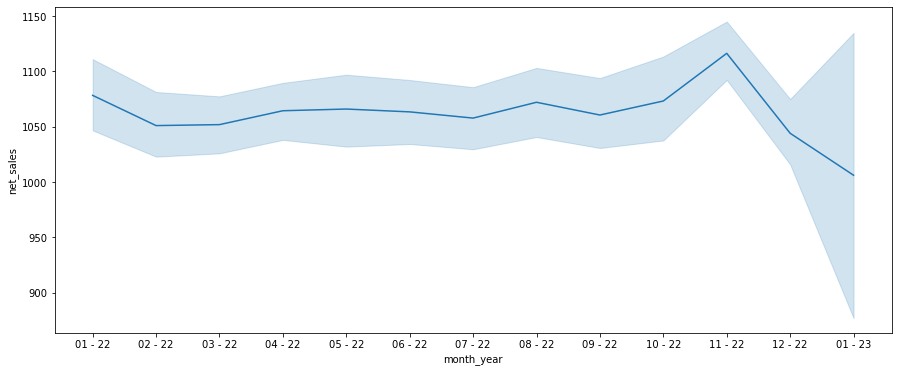

In [15]:
plt.figure(figsize=[15,6])
sns.lineplot(x=df1['month_year'],y=df1['net_sales'])
plt.savefig('upgrad_overall_sales_trend.jpeg')
plt.show()


# Overall sales Trend
* After Nov-2022 sales are dropping

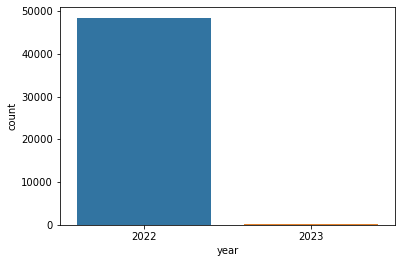

2022    48457
2023       90
Name: year, dtype: int64

In [16]:
sns.countplot(data=df1,x='year')
plt.savefig('upgrad_year.jpeg')
plt.show()
df1['year'].value_counts()

* 99% of data shows 2022 sales only

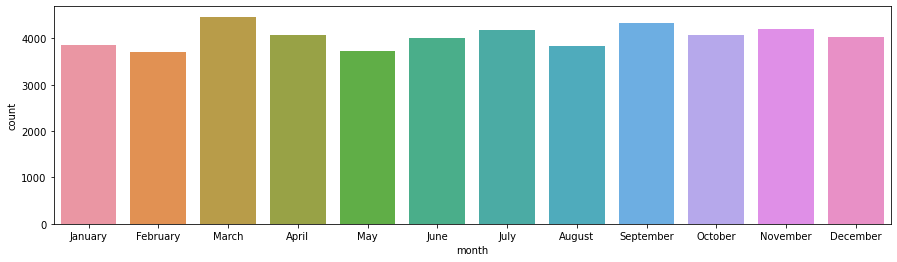

In [248]:
plt.figure(figsize=[15,4])
sns.countplot(data=df1,x='month')
plt.savefig('upgrad_month.jpeg')
plt.show()

# Month wise Analysis
* Almost all months sales are same

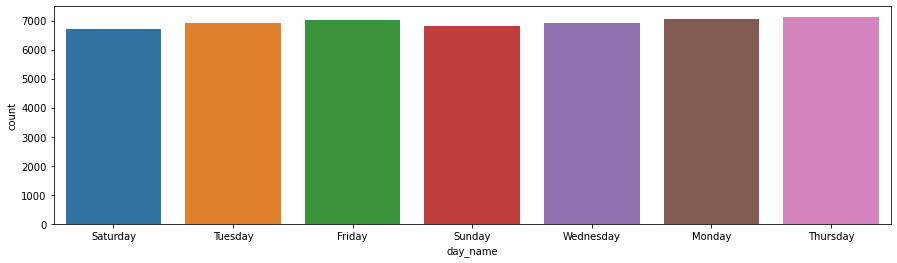

In [249]:
plt.figure(figsize=[15,4])
sns.countplot(data=df1,x='day_name')
plt.savefig('upgrad_day.jpeg')
plt.show()

* Almost same sales happened in all day

In [19]:
# Place wise analysis

sh_re=df1['shipping_region'].value_counts()
sh_re.to_clipboard()
sh_re

Maharashtra                    7879
Karnataka                      7440
Delhi                          4168
Tamil Nadu                     4100
Uttar Pradesh                  3173
Haryana                        2922
Telangana                      2861
Gujarat                        2053
Kerala                         1633
West Bengal                    1487
Punjab                         1378
Andhra Pradesh                 1258
Rajasthan                      1097
Madhya Pradesh                  938
Jammu And Kashmir               709
Assam                           671
Bihar                           528
Odisha                          508
Chhattisgarh                    470
Uttarakhand                     454
Jharkhand                       407
Goa                             317
Chandigarh                      292
Arunachal Pradesh               259
Himachal Pradesh                246
Meghalaya                       199
Sikkim                          170
Nagaland                    

## Shipping Region frequencies

In [70]:
sh_re.iloc[0:10]

Maharashtra      7879
Karnataka        7440
Delhi            4168
Tamil Nadu       4100
Uttar Pradesh    3173
Haryana          2922
Telangana        2861
Gujarat          2053
Kerala           1633
West Bengal      1487
Name: shipping_region, dtype: int64

## Most frequent shipping region

In [75]:
sh_re.sort_values().iloc[0:16]

Texas               1
Alberta             1
Tennessee           1
Illinois            1
British Columbia    1
Abu Dhabi           1
Gauteng             1
North Carolina      1
Washington          2
Virginia            3
Victoria            3
Indiana             4
Milano              4
Florida             4
Selangor            8
Dubai               9
Name: shipping_region, dtype: int64

## Less frequent shipping regions

In [21]:
sh_ci=df1['shipping_city'].value_counts()
sh_ci

Mumbai           3475
Bengaluru        3310
Bangalore        2345
New Delhi        2308
Hyderabad        2034
                 ... 
Kukatpally          1
Gujrat              1
Jhumriteliaya       1
Anakapalli          1
Ner Chowk           1
Name: shipping_city, Length: 3823, dtype: int64

In [23]:
sh_ci.iloc[0:10].to_clipboard()
sh_ci.iloc[0:10]



Mumbai       3475
Bengaluru    3310
Bangalore    2345
New Delhi    2308
Hyderabad    2034
Chennai      1895
Delhi        1652
Pune         1590
Kolkata       971
Gurugram      954
Name: shipping_city, dtype: int64

## Most frequent shipping cities

In [24]:
sh_ci.sort_values().iloc[0:1736].to_clipboard()
sh_ci.sort_values().iloc[0:1736]

Ner Chowk           1
Marhaura            1
Nokha               1
Ambarnath           1
New Delni           1
                   ..
Tellapur            1
Andhra Pradesh      1
Lakhanpur Ladpur    1
Verinag             1
Udhawa              1
Name: shipping_city, Length: 1736, dtype: int64

## 45% of cities having 1 order 

In [116]:
region_sales=df1.groupby('shipping_region').sum()['net_sales'].sort_values(ascending=False)
region_sales

shipping_region
Maharashtra                    8401033.18
Karnataka                      7630682.08
Delhi                          4774426.49
Tamil Nadu                     4373033.63
Uttar Pradesh                  3445249.92
Haryana                        3296493.60
Telangana                      2928323.22
Gujarat                        2073110.13
Kerala                         1657012.74
West Bengal                    1522568.30
Punjab                         1510665.01
Andhra Pradesh                 1225067.61
Rajasthan                      1121045.69
Madhya Pradesh                  965062.11
Jammu And Kashmir               872236.67
Assam                           690643.52
Bihar                           559162.87
Chhattisgarh                    535252.95
Odisha                          513185.49
Uttarakhand                     466261.73
Jharkhand                       436867.46
Chandigarh                      332192.91
Goa                             319453.48
Arunachal Pradesh 

## Region wise net sales report

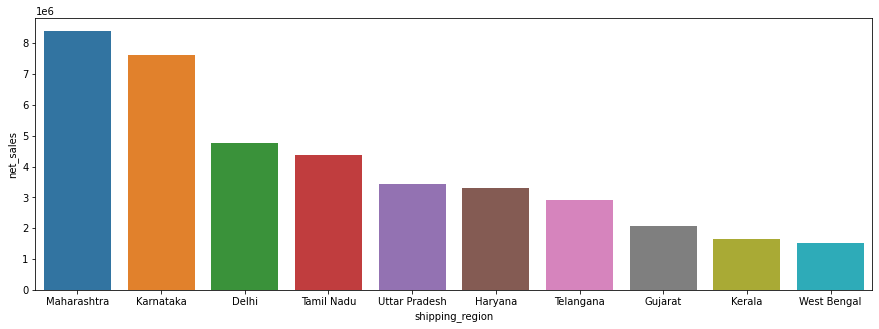

In [252]:
plt.figure(figsize=[15,5])
sns.barplot(data=region_sales.reset_index().iloc[0:10],x='shipping_region',y='net_sales')
plt.savefig('upgrad_Top 10 regions net_sales wise.jpeg')
plt.show()

## Top 10 regions net_sales wise

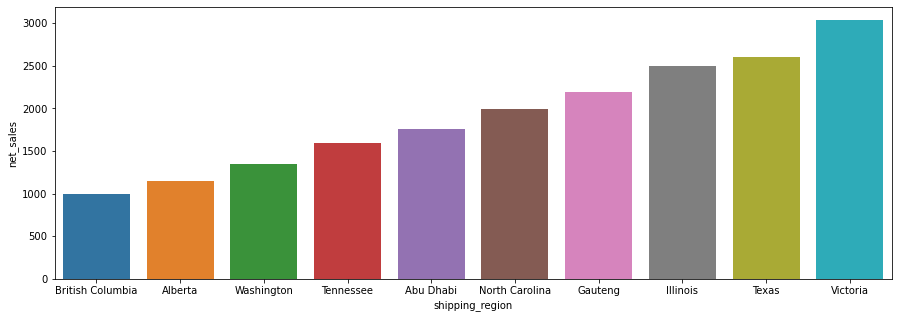

In [253]:
plt.figure(figsize=[15,5])
sns.barplot(data=region_sales.sort_values().reset_index().iloc[0:10],x='shipping_region',y='net_sales')
plt.savefig('upgrad_least 10 regions net_sales wise.jpeg')
plt.show()

## least 10 regions  net_sales wise

In [134]:
region_orders=df1.groupby('shipping_region').sum()['ordered_item_quantity'].sort_values(ascending=False)
region_orders

shipping_region
Maharashtra                    8332
Karnataka                      8065
Delhi                          4407
Tamil Nadu                     4287
Uttar Pradesh                  3319
Haryana                        3097
Telangana                      3001
Gujarat                        2153
Kerala                         1693
West Bengal                    1561
Punjab                         1428
Andhra Pradesh                 1325
Rajasthan                      1140
Madhya Pradesh                  975
Jammu And Kashmir               744
Assam                           697
Bihar                           569
Odisha                          543
Chhattisgarh                    492
Uttarakhand                     472
Jharkhand                       420
Goa                             340
Chandigarh                      312
Arunachal Pradesh               271
Himachal Pradesh                253
Meghalaya                       207
Sikkim                          173
Nagaland    

## Regions list by ordered quantity wise

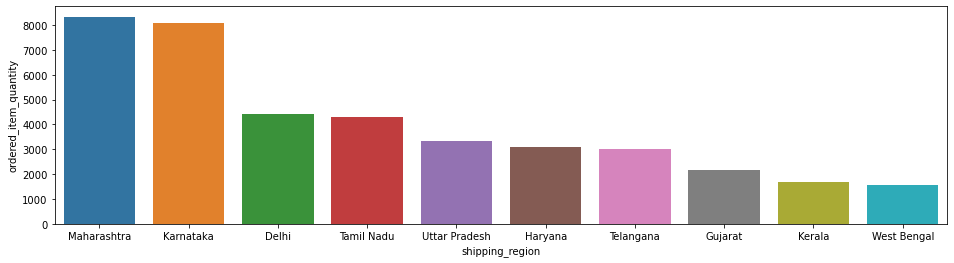

In [254]:
plt.figure(figsize=[16,4])
sns.barplot(data=region_orders.reset_index().iloc[0:10],x='shipping_region',y='ordered_item_quantity')
plt.savefig('upgrad_Top 10 regions by ordered quantity.jpeg')
plt.show()

## Top 10 regions by ordered quantity

In [25]:
df1.groupby('shipping_region').mean()['taxes'].sort_values(ascending=False).to_clipboard()
df1.groupby('shipping_region').mean()['taxes'].sort_values(ascending=False)

shipping_region
Puducherry                     241.748315
Sikkim                         238.657588
Manipur                        226.368993
Jammu And Kashmir              221.442087
Arunachal Pradesh              214.274093
Daman And Diu                  209.974286
Delhi                          206.189055
Chhattisgarh                   204.989979
Chandigarh                     204.776473
Nagaland                       204.261946
Haryana                        203.069189
Tripura                        199.780508
Punjab                         197.211640
Karnataka                      195.777091
Uttar Pradesh                  195.335065
Meghalaya                      194.254925
Jharkhand                      193.208673
Tamil Nadu                     191.939829
Maharashtra                    191.857368
Bihar                          190.623466
Assam                          185.269180
Uttarakhand                    184.861167
Madhya Pradesh                 184.793817
West Bengal       

## Regions list by average tax wise

In [148]:
df1['product_type'].nunique()

301

In [149]:
# Totally 301 different type of products selling by store

In [27]:
product_type_sales=df1.groupby('product_type').sum()['net_sales'].sort_values(ascending=False)
product_type_sales.to_clipboard()
product_type_sales

product_type
Maternity Casual Dress    3161020.27
Maternity Gown            2343084.76
Twinning Tees             2296529.07
Baby Pyjamas Set          2059686.78
Maternity Ethnic Set      1923198.40
                             ...    
Raakhi                        298.57
Baby Wash                     287.42
Wellness                      202.72
Toothpaste                    117.54
Baby Mittens                   71.38
Name: net_sales, Length: 301, dtype: float64

## product types list by net_sales

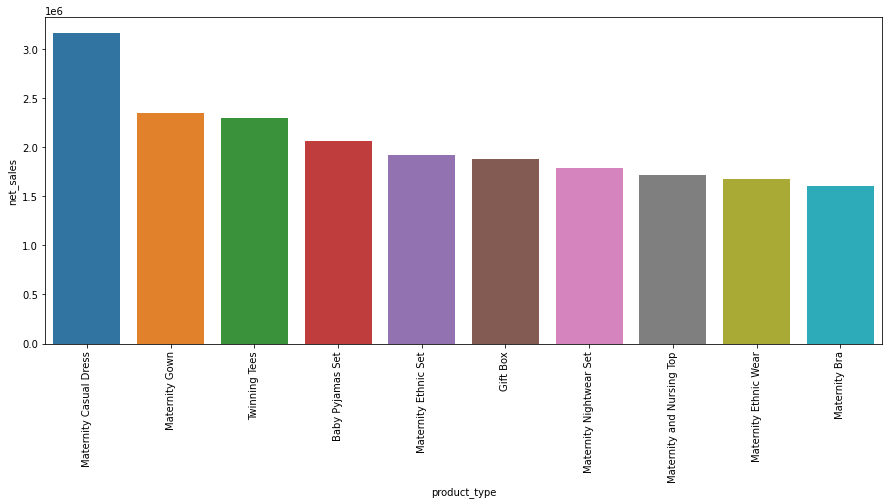

In [255]:
plt.figure(figsize=[15,6])
sns.barplot(data=product_type_sales.reset_index().iloc[0:10],x='product_type',y='net_sales')
plt.xticks(rotation=90)
plt.savefig('upgrad_Top 10 product types by net_sales.jpeg')
plt.show()

## Top 10 product types by net_sales

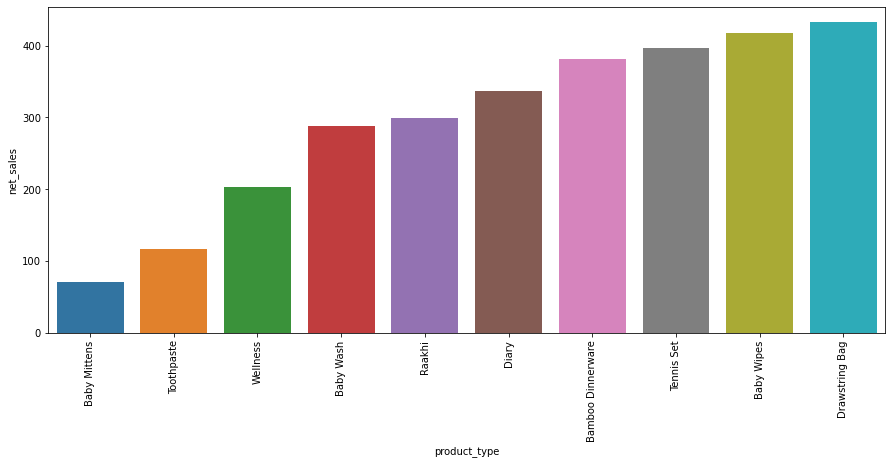

In [256]:
plt.figure(figsize=[15,6])
sns.barplot(data=product_type_sales.reset_index().sort_values(by='net_sales',ascending=True).iloc[0:10],x='product_type',y='net_sales')
plt.xticks(rotation=90)
plt.savefig('upgrad_Least 10 product types by net_sales.jpeg')
plt.show()

## Least 10 product types by net_sales

In [26]:
df1.groupby('product_type').sum()['ordered_item_quantity'].sort_values(ascending=False).to_clipboard()
df1.groupby('product_type').sum()['ordered_item_quantity'].sort_values(ascending=False)

product_type
Twinning Tees             5417
Maternity Casual Dress    2522
unknown_product_type      2508
Baby Pyjamas Set          2325
Maternity Bra             2152
                          ... 
Table & Chair                1
Diary                        1
Tennis Set                   1
Furniture                    1
Super Seat                   1
Name: ordered_item_quantity, Length: 301, dtype: int64

## product types list with total ordered quantity

In [28]:
df1.groupby('product_type').sum()['discounts'].sort_values(ascending=True).reset_index().to_clipboard()
df1.groupby('product_type').sum()['discounts'].sort_values(ascending=True).reset_index().iloc[0:20]

,product_type,discounts
0,Maternity Casual Dress,-372981.31
1,Maternity Gown,-239683.65
2,Maternity Ethnic Set,-236668.26
3,Twinning Tees,-210719.73
4,Maternity Ethnic Wear,-206297.33
5,Gift Box,-197218.82
6,Baby Pyjamas Set,-184965.34
7,Maternity Nightwear Set,-181447.84
8,Maternity and Nursing Top,-180173.26
9,Baby Carrier,-174611.69


## Top 20 highest discount product types

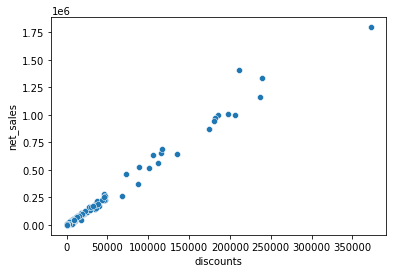

In [257]:
df2=df1[df1['discounts']!=0]
sns.scatterplot(x=-df2.groupby('product_type').sum()['discounts'],y=df2.groupby('product_type').sum()['net_sales'])
plt.savefig('upgrad_Discount increases accordingly product price.jpeg')
plt.show()


## Discount increases accordingly product price

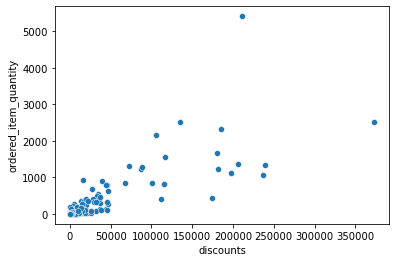

In [258]:
sns.scatterplot(y=df1.groupby('product_type').sum()['ordered_item_quantity'],x=-df1.groupby('product_type').sum()['discounts'])
plt.savefig('upgrad_discount_quantity_corr.jpeg')
plt.show()

In [217]:
df1[['discounts','ordered_item_quantity']].corr()

,discounts,ordered_item_quantity
discounts,1.000000,-0.072414
ordered_item_quantity,-0.072414,1.000000


## if discount increases does not increasing product quantity

In [199]:
df1.groupby('product_type').sum()['taxes'].sort_values(ascending=False)

product_type
Maternity Casual Dress    569368.32
Maternity Gown            433163.96
Twinning Tees             412532.93
Baby Pyjamas Set          368097.33
Maternity Ethnic Set      345224.03
                            ...    
Raakhi                        53.75
Baby Wash                     51.73
Wellness                      36.48
Toothpaste                    21.16
Baby Mittens                  12.85
Name: taxes, Length: 301, dtype: float64

## Product types list by tax wise

In [29]:
df1.groupby('product_type').mean()['taxes'].sort_values(ascending=False).to_clipboard()
df1.groupby('product_type').mean()['taxes'].sort_values(ascending=False).iloc[0:20]

product_type
Library Package      2455.930000
Activity Seat        1872.764000
Baby Sleep Gear      1809.985714
Toy Chest            1773.760000
Kitchen Tower        1683.377857
SuperSeat            1513.824286
Travel and Gear      1464.250000
Baby Swing           1456.350244
Table and Chair      1405.553333
Place Mat            1403.240000
Baby Crib            1388.616667
Twin Strollers       1377.916667
Super Seat           1372.740000
Slide                1280.070000
Baby Feeding Gear    1254.953704
Table & Chair        1220.190000
Play Mat             1172.341250
Baby Swings          1111.368750
Desk Set             1111.016667
Ride On Toys         1067.640000
Name: taxes, dtype: float64

## Top 20 highest average tax product types

In [204]:
df1.groupby('product_type').mean()['taxes'].sort_values(ascending=True).iloc[0:20]

product_type
Gift Wrapping                    4.804020
Baby Mittens                     6.425000
Raakhi                          10.750000
Baby Booties                    13.433684
Mittens and Booties Set         13.851842
Baby Caps                       14.635000
Toothpaste                      21.160000
Baby Pillow                     26.863333
Teething Ring                   28.130000
Baby Soap                       30.993913
Kids Mask                       31.874524
Baby Skin Care                  35.092500
Mittens, Booties and Cap set    35.989989
Wellness                        36.480000
Rose Water                      37.953333
Adult Mask                      39.828000
Hygiene Essentials              50.882000
Rattle                          50.884000
Baby Wash                       51.730000
Massage Oil                     54.270909
Name: taxes, dtype: float64

## least 20 product types by average tax

In [30]:
df1.groupby(['shipping_region','product_type']).sum()['net_sales'].to_clipboard()
df1.groupby(['shipping_region','product_type']).sum()['net_sales']

shipping_region              product_type          
Abu Dhabi                    Maternity Gown            1759.12
Alberta                      Baby Blanket              1143.12
Andaman And Nicobar Islands  Baby Crib Sheet            846.61
                             Baby Grooming Kit          990.76
                             Baby Jewellery            1440.68
                                                        ...   
unknown_shipping_region      Swings                    2440.35
                             Twinning Tees             3837.86
                             Winter Caps for Babies     337.88
                             Winter Trouser            1499.00
                             unknown_product_type        61.60
Name: net_sales, Length: 3817, dtype: float64

## Region wise highest selling products

In [31]:
region_product=df1.groupby(['shipping_region','product_type']).sum()['net_sales'].sort_values(ascending=False).reset_index()
region_product.to_clipboard()
region_product

,shipping_region,product_type,net_sales
0,Karnataka,Maternity Casual Dress,607983.75
1,Maharashtra,Maternity Casual Dress,559911.07
2,Karnataka,Maternity Gown,469924.21
3,Maharashtra,Gift Box,450897.69
4,Maharashtra,Maternity Gown,413142.87
...,...,...,...
3812,Bihar,Gift Wrapping,26.69
3813,Chhattisgarh,Gift Wrapping,26.69
3814,Andhra Pradesh,Baby Christmas Socks,9.21
3815,Delhi,Stretch Marks Balm,8.47


In [214]:
region_product.iloc[0:10]

,shipping_region,product_type,net_sales
0,Karnataka,Maternity Casual Dress,607983.75
1,Maharashtra,Maternity Casual Dress,559911.07
2,Karnataka,Maternity Gown,469924.21
3,Maharashtra,Gift Box,450897.69
4,Maharashtra,Maternity Gown,413142.87
5,Karnataka,Maternity Ethnic Set,365858.92
6,Maharashtra,Baby Pyjamas Set,349656.62
7,Maharashtra,Maternity Leggings,348745.52
8,Karnataka,Maternity Ethnic Wear,338526.23
9,Maharashtra,Twinning Tees,337706.74


## Top 10 selling product types along with shipping region

In [261]:
top_producttitle=df1.groupby(['product_title','product_type']).sum()['net_sales'].reset_index().sort_values('net_sales',ascending=False).iloc[0:20]
top_producttitle

,product_title,product_type,net_sales
831,Comfy Maternity Leggings Black,Maternity Leggings,960249.29
834,Comfy Maternity Regular Pants - Black,Maternity Trackpants,609506.96
2190,Nursing Pumping Bra Grey-Hand Free,Maternity Bra,480627.55
379,Baby Travel and Grooming Kit- Yellow,Baby Grooming Kit,424494.50
2188,Nursing Pumping Bra Black-Hand Free,Maternity Bra,418981.95
1080,Elegant Wine Maternity Dress,Maternity Gown,408138.23
2309,Pajama Set Combo of 3: Dino Trip-Tall as a Gir...,Baby Pyjamas Set,402839.75
2759,Rule Breaker Kids T shirt,Twinning Tees,353646.00
2764,Rule Changer Mens T shirt,Twinning Tees,351887.96
2766,Rule Maker Womens T shirt,Twinning Tees,350454.70


In [262]:
top_producttitle.to_csv('upgrad_top_selling_producttitles.csv')

## Top 20 highest sales product titles along with product type

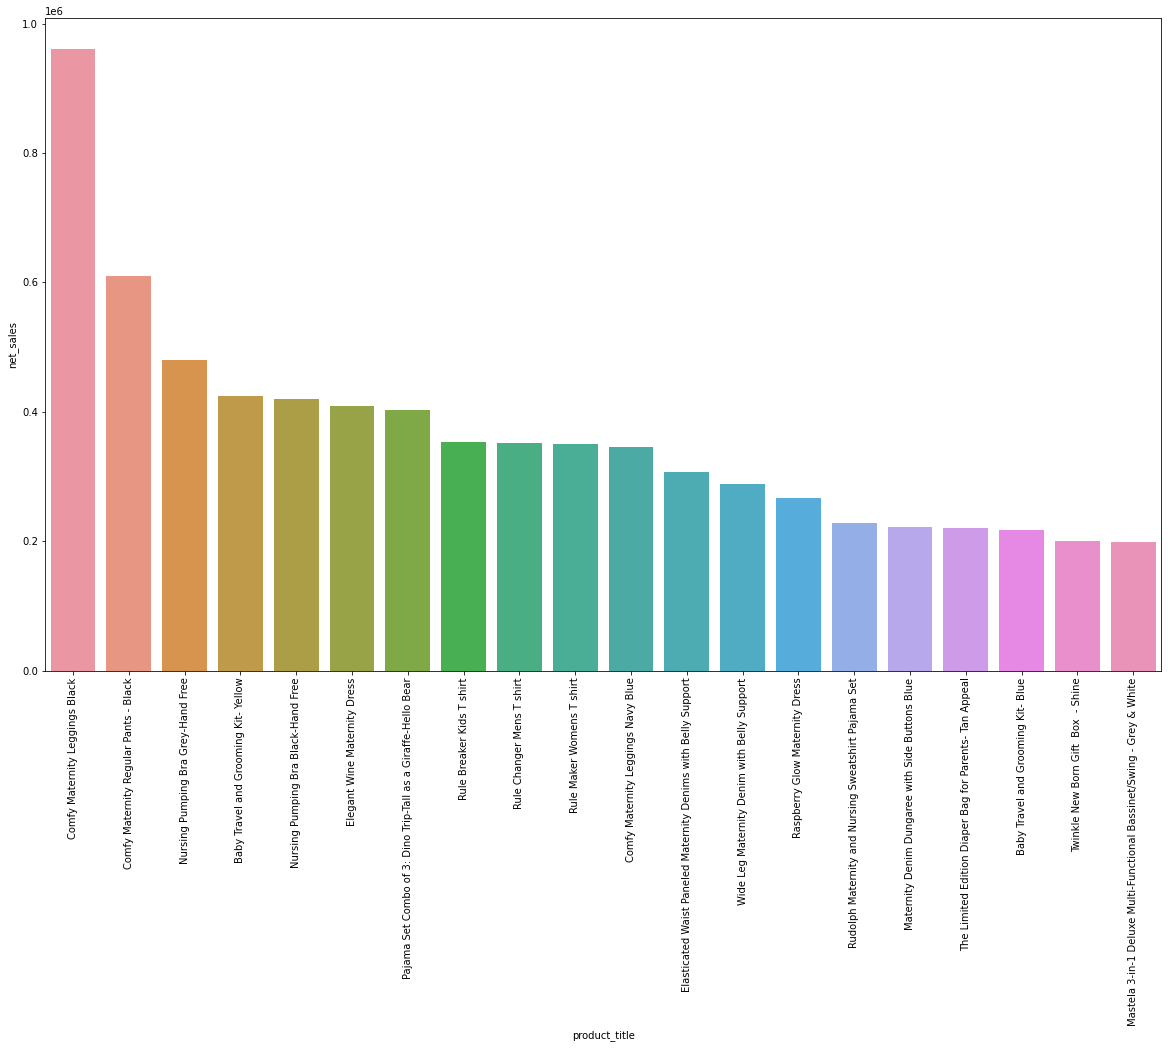

In [259]:
plt.figure(figsize=[20,12])
sns.barplot(data=df1.groupby(['product_title','product_type']).sum()['net_sales'].reset_index().sort_values('net_sales',ascending=False).iloc[0:20],x='product_title',y='net_sales')
plt.xticks(rotation=90)
plt.savefig('upgrad_top20_producttitles.jpeg')
plt.show()

## For all identification refer above content
## Recommendations:



* After November – 2022 sales are started to dropping
  need to identify the reason for this drop
* Identify the most frequent and least frequent shipping region accordingly plan the transportation and maintain the inventory
* 45% of cities are getting 1 order only so need to look into this accordingly plan the marketing campaign plans
* Identify the regions with low tax and try to increase the sale to this regions 
* Identify the high discount product types and give discount accordingly region and product wise
* Refer Top 10 product types accordingly increase those products supply to avoid shortage
* Identify which products selling more in which regions accordingly can plan the logistic to reduce the transportation and       storage cost
* Not more Correlation between discount and number of quantity ordered so accordingly plan the discounts
* Discount does not affect of the quantity ordered
* Identify the low tax products accordingly plan to increase the sales of that product that will give more profit


